In [1]:
""" based off of this tutorial: https://apmonitor.com/dde/index.php/Main/AudioAnalysis """
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
f1 = "/home/jhc325/git/phys2210/egl49/AUDIO_9434.wav"
s, a = wavfile.read(f1)
print(a)
print (f'sampling rate: {s}')
print (f'audio shape: {np.shape(a)}')

[ 0  0  0 ...  0  1 -2]
sampling rate: 48000
audio shape: (939008,)


/tmp/ipykernel_1738/2761920604.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  s, a = wavfile.read(f1)


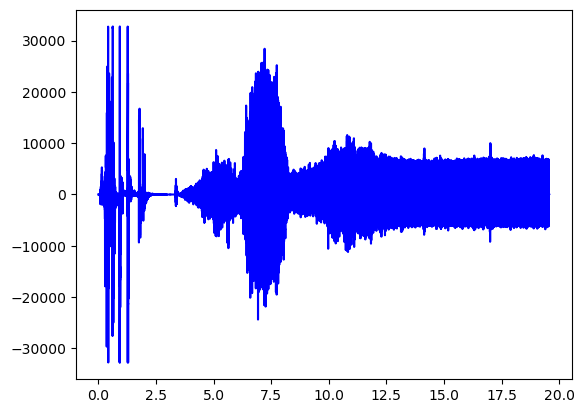

In [3]:
length = len(a) / s
time = np.linspace(0., length, len(a))
plt.plot(time, a, label="Left channel", color='b')
#plt.plot(time, a[:, 1], label="Right channel", color='g')
#plt.legend()

In [4]:
print(a)
print(len(a))

[ 0  0  0 ...  0  1 -2]
939008


In [15]:
#analyze entire audio cliphnh
na = len(a)
dt=1/s
#print(na)
#print(int(na/2))
atilde = np.fft.rfft(a)*dt # FFT function from numpy
a_freq = np.fft.rfftfreq(na, dt)   # frequency
print(len(atilde))
print(len(a_freq))

469505
469505


In [6]:
#analyze entire audio clip
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

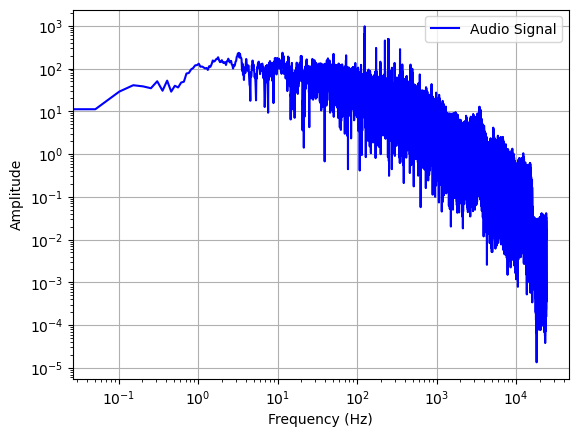

In [9]:
#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,'b-',label='Audio Signal')
ax.set_xscale('log'); ax.set_yscale('log')
plt.grid(); plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()

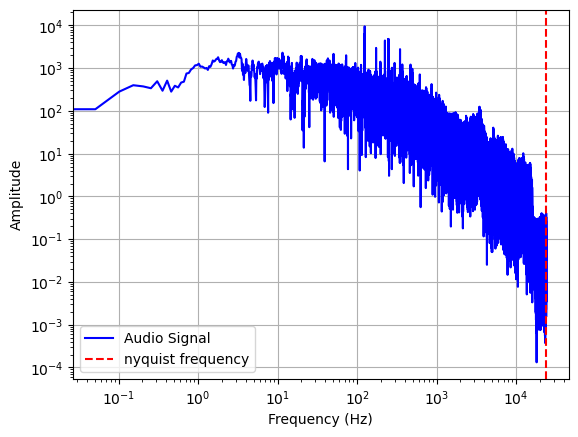

In [19]:
#plotting
fig,ax = plt.subplots()
plt.loglog(a_freq,abs(atilde),'b-',label='Audio Signal')
plt.axvline(s/2, ls = "--", color="red", label="nyquist frequency")
plt.grid(); plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()